# 📊 Customer Data Exploration
## AI Upsell Prediction System - Phase 1

**Objective**: Understand customer behavior patterns in telecom data to identify upsell opportunities

**Team**: CTS Hackathon 2025 - AI Innovators

**Dataset**: 101,175 telecom customers with usage patterns and churn data

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

print("📚 Libraries imported successfully!")
print("🎯 Ready for data exploration!")

📚 Libraries imported successfully!
🎯 Ready for data exploration!


In [2]:
# Load the telecom dataset
df = pd.read_csv('../data/raw/telecom_data.csv', low_memory=False)

print(f"🎉 AMAZING! Dataset loaded successfully!")
print(f"📊 Dataset shape: {df.shape}")
print(f"👥 Total customers: {df.shape[0]:,}")
print(f"📋 Features: {df.shape[1]}")
print(f"💾 File size: ~8.2 MB")

🎉 AMAZING! Dataset loaded successfully!
📊 Dataset shape: (101175, 17)
👥 Total customers: 101,175
📋 Features: 17
💾 File size: ~8.2 MB


In [3]:
# Display first few rows
print("🔍 First 5 customers:")
display(df.head())

print("\n📊 Dataset Info:")
df.info()

🔍 First 5 customers:


,Phone Number,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,382-4657,128.0,25.0,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1.0,False
1,371-7191,107.0,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0,False
2,358-1921,137.0,0.0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0,False
3,375-9999,84.0,0.0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,8.86,6.6,7.0,1.78,2.0,False
4,330-6626,75.0,0.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0,False



📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101175 entries, 0 to 101174
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Phone Number    101175 non-null  object 
 1   Account Length  101174 non-null  float64
 2   VMail Message   101174 non-null  float64
 3   Day Mins        101174 non-null  float64
 4   Day Calls       101174 non-null  float64
 5   Day Charge      101174 non-null  float64
 6   Eve Mins        101174 non-null  float64
 7   Eve Calls       101174 non-null  float64
 8   Eve Charge      101174 non-null  float64
 9   Night Mins      101174 non-null  float64
 10  Night Calls     101174 non-null  float64
 11  Night Charge    101174 non-null  float64
 12  Intl Mins       101174 non-null  float64
 13  Intl Calls      101174 non-null  float64
 14  Intl Charge     101174 non-null  float64
 15  CustServ Calls  101174 non-null  float64
 16  Churn           101174 non-null  object

In [4]:
# Statistical summary
print("📈 Statistical Summary:")
display(df.describe())

📈 Statistical Summary:


,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,101174.000000,101174.000000,101174.000000,101174.000000,101174.000000,101174.000000,101174.000000,101174.000000,101174.000000,101174.000000,101174.000000,101174.000000,101174.000000,101174.000000,101174.000000
mean,323.597149,18.142645,587.080798,267.207613,64.958811,655.512526,267.166930,34.358125,646.786643,261.673187,13.900142,20.291269,5.737798,4.347635,2.559640
std,1418.073651,75.826932,2193.094319,947.963370,133.515808,2473.445436,932.914437,36.248577,2368.028491,884.963021,16.178685,25.033214,8.196367,2.761911,2.401904
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.300000,20.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,69.000000,0.000000,222.300000,88.000000,23.920000,223.300000,88.000000,22.220000,223.200000,88.000000,6.220000,8.800000,2.000000,2.280000,2.000000
50%,202.000000,0.000000,262.200000,202.000000,32.600000,268.200000,202.000000,24.440000,268.200000,202.000000,9.220000,20.200000,4.000000,2.920000,2.000000
75%,240.000000,22.000000,326.275000,224.000000,82.200000,329.200000,224.000000,32.020000,329.200000,224.000000,20.440000,22.800000,8.000000,4.940000,3.000000
max,21111.000000,1111.000000,111111.110000,21111.000000,1111.990000,111111.200000,21111.000000,211.990000,111111.110000,21111.000000,211.920000,211.900000,211.000000,11.920000,11.000000


In [5]:
# Check for missing values and data quality
print("🔍 Data Quality Analysis:")

# Missing values
missing_data = df.isnull().sum()
if missing_data.any():
    print("Missing values:")
    print(missing_data[missing_data > 0])
else:
    print("✅ No missing values found!")

# Duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")

# Data types
print("\n📋 Data Types:")
print(df.dtypes)

🔍 Data Quality Analysis:
Missing values:
Account Length    1
VMail Message     1
Day Mins          1
Day Calls         1
Day Charge        1
Eve Mins          1
Eve Calls         1
Eve Charge        1
Night Mins        1
Night Calls       1
Night Charge      1
Intl Mins         1
Intl Calls        1
Intl Charge       1
CustServ Calls    1
Churn             1
dtype: int64

Duplicate rows: 40729

📋 Data Types:
Phone Number       object
Account Length    float64
VMail Message     float64
Day Mins          float64
Day Calls         float64
Day Charge        float64
Eve Mins          float64
Eve Calls         float64
Eve Charge        float64
Night Mins        float64
Night Calls       float64
Night Charge      float64
Intl Mins         float64
Intl Calls        float64
Intl Charge       float64
CustServ Calls    float64
Churn              object
dtype: object


In [6]:
# Customer behavior overview
print("👥 Customer Behavior Overview:")

# Usage statistics
print(f"📞 Average day usage: {df['Day Mins'].mean():.1f} minutes")
print(f"🌆 Average evening usage: {df['Eve Mins'].mean():.1f} minutes") 
print(f"🌙 Average night usage: {df['Night Mins'].mean():.1f} minutes")
print(f"🌍 Average international usage: {df['Intl Mins'].mean():.1f} minutes")
print(f"📞 Average service calls: {df['CustServ Calls'].mean():.1f}")

# Churn analysis
churn_rate = df['Churn'].value_counts(normalize=True)
print(f"\n📊 Churn Analysis:")
print(f"   Stayed: {churn_rate[False]:.1%}")
print(f"   Churned: {churn_rate[True]:.1%}")

👥 Customer Behavior Overview:
📞 Average day usage: 587.1 minutes
🌆 Average evening usage: 655.5 minutes
🌙 Average night usage: 646.8 minutes
🌍 Average international usage: 20.3 minutes
📞 Average service calls: 2.6

📊 Churn Analysis:
   Stayed: 89.6%
   Churned: 10.4%


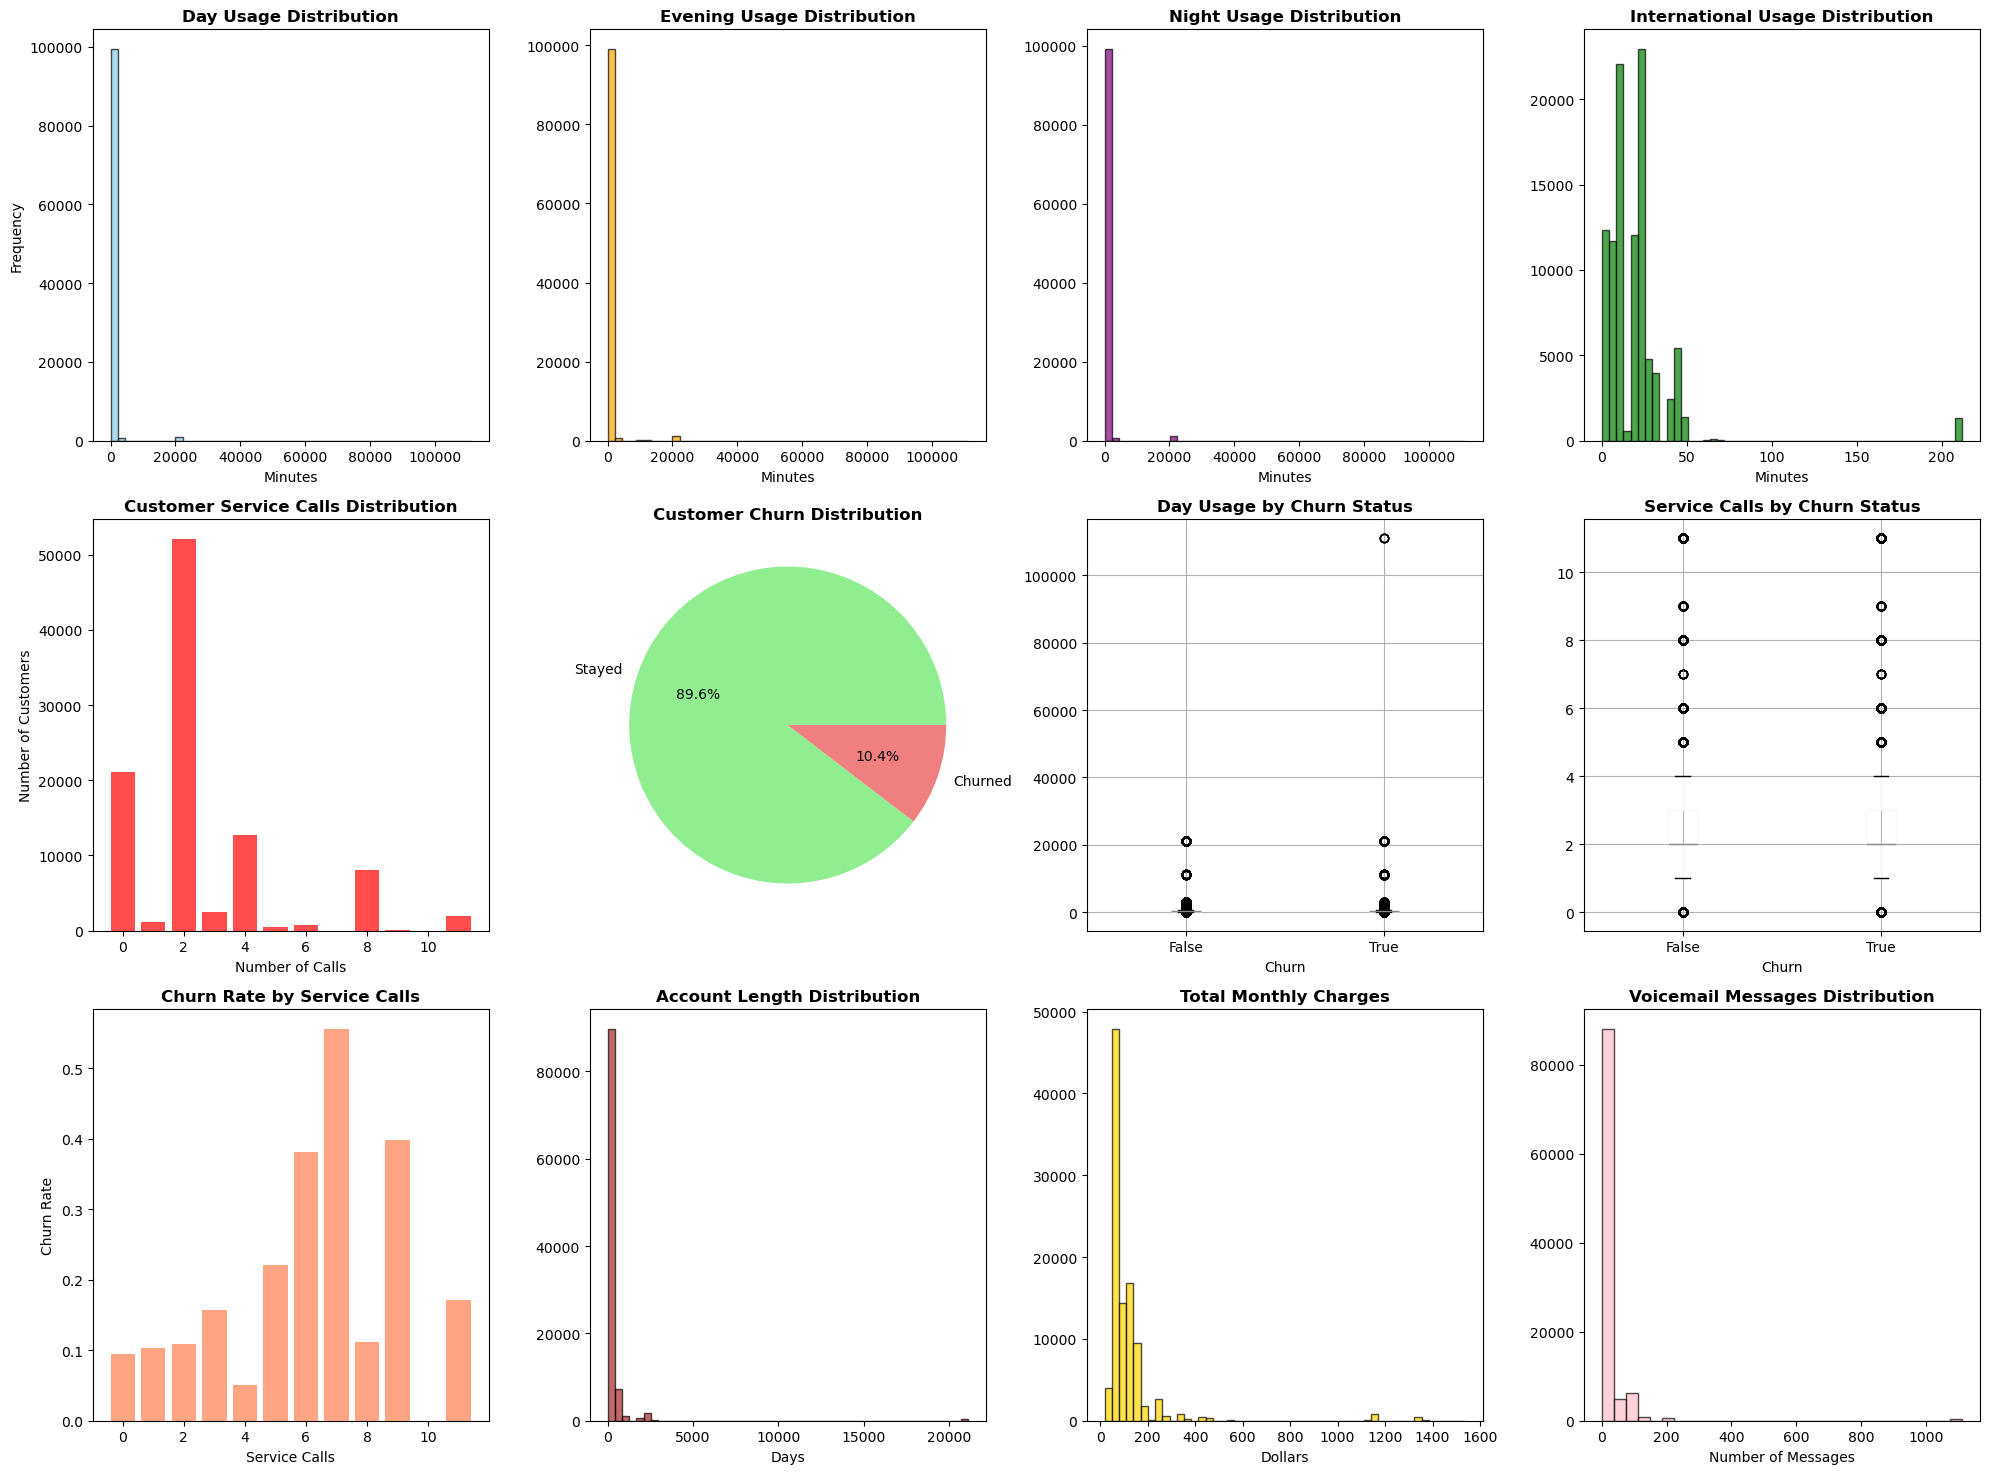


🎯 Key Insights from Initial Analysis:
📞 Heavy day users (>300 mins): 28,258 customers (27.9%)
🌍 International users (>5 mins): 86,375 customers (85.4%)
📞 High service users (>2 calls): 26,771 customers (26.5%)
💰 Potential upsell opportunities: 51,790 customers (51.2%)
🌆 Evening heavy users (>250 mins): 56,110 customers (55.5%)


In [7]:
# Quick visualization for initial insights
plt.figure(figsize=(20, 15))

# Usage patterns
plt.subplot(3, 4, 1)
plt.hist(df['Day Mins'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Day Usage Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Minutes')
plt.ylabel('Frequency')

plt.subplot(3, 4, 2)
plt.hist(df['Eve Mins'], bins=50, alpha=0.7, color='orange', edgecolor='black')
plt.title('Evening Usage Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Minutes')

plt.subplot(3, 4, 3)
plt.hist(df['Night Mins'], bins=50, alpha=0.7, color='purple', edgecolor='black')
plt.title('Night Usage Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Minutes')

plt.subplot(3, 4, 4)
plt.hist(df['Intl Mins'], bins=50, alpha=0.7, color='green', edgecolor='black')
plt.title('International Usage Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Minutes')

# Service calls
plt.subplot(3, 4, 5)
service_counts = df['CustServ Calls'].value_counts().sort_index()
plt.bar(service_counts.index, service_counts.values, alpha=0.7, color='red')
plt.title('Customer Service Calls Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Number of Calls')
plt.ylabel('Number of Customers')

# Churn analysis
plt.subplot(3, 4, 6)
churn_counts = df['Churn'].value_counts()
plt.pie(churn_counts.values, labels=['Stayed', 'Churned'], autopct='%1.1f%%', 
        colors=['lightgreen', 'lightcoral'])
plt.title('Customer Churn Distribution', fontsize=12, fontweight='bold')

# Usage vs Churn
plt.subplot(3, 4, 7)
df.boxplot(column='Day Mins', by='Churn', ax=plt.gca())
plt.title('Day Usage by Churn Status', fontsize=12, fontweight='bold')
plt.suptitle('')  # Remove the automatic title

plt.subplot(3, 4, 8)
df.boxplot(column='CustServ Calls', by='Churn', ax=plt.gca())
plt.title('Service Calls by Churn Status', fontsize=12, fontweight='bold')
plt.suptitle('')  # Remove the automatic title

# Service calls vs churn rate
plt.subplot(3, 4, 9)
service_churn = df.groupby('CustServ Calls')['Churn'].mean()
plt.bar(service_churn.index, service_churn.values, alpha=0.7, color='coral')
plt.title('Churn Rate by Service Calls', fontsize=12, fontweight='bold')
plt.xlabel('Service Calls')
plt.ylabel('Churn Rate')

# Account length distribution
plt.subplot(3, 4, 10)
plt.hist(df['Account Length'], bins=50, alpha=0.7, color='brown', edgecolor='black')
plt.title('Account Length Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Days')

# Total charges distribution
plt.subplot(3, 4, 11)
total_charges = df['Day Charge'] + df['Eve Charge'] + df['Night Charge'] + df['Intl Charge']
plt.hist(total_charges, bins=50, alpha=0.7, color='gold', edgecolor='black')
plt.title('Total Monthly Charges', fontsize=12, fontweight='bold')
plt.xlabel('Dollars')

# VMail usage
plt.subplot(3, 4, 12)
plt.hist(df['VMail Message'], bins=30, alpha=0.7, color='pink', edgecolor='black')
plt.title('Voicemail Messages Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Number of Messages')

plt.tight_layout()
plt.show()

print("\n🎯 Key Insights from Initial Analysis:")
print(f"📞 Heavy day users (>300 mins): {(df['Day Mins'] > 300).sum():,} customers ({(df['Day Mins'] > 300).mean():.1%})")
print(f"🌍 International users (>5 mins): {(df['Intl Mins'] > 5).sum():,} customers ({(df['Intl Mins'] > 5).mean():.1%})")
print(f"📞 High service users (>2 calls): {(df['CustServ Calls'] > 2).sum():,} customers ({(df['CustServ Calls'] > 2).mean():.1%})")
print(f"💰 Potential upsell opportunities: {(df['Day Mins'] > 250).sum():,} customers ({(df['Day Mins'] > 250).mean():.1%})")
print(f"🌆 Evening heavy users (>250 mins): {(df['Eve Mins'] > 250).sum():,} customers ({(df['Eve Mins'] > 250).mean():.1%})")